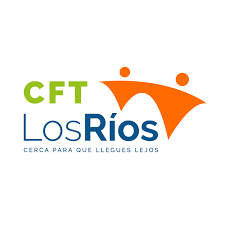
## Curso: Aprendizaje Supervisado
## Profesor: Diego Miranda Olavarría
#### Data Scientist

In [1]:
import pandas as pd

data = pd.read_csv('student.csv')

data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
X = data.drop('GradeClass', axis=1) 
y = data['GradeClass']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Crear el modelo de árbol de decisión
decision_tree = DecisionTreeClassifier(random_state=42)

In [5]:
# Ajustar el modelo a los datos de entrenamiento
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
# Realizar predicciones con los datos de prueba
y_pred_dt = decision_tree.predict(X_test)
y_pred_dt

array([4., 1., 1., 0., 4., 2., 3., 3., 3., 4., 4., 4., 2., 4., 2., 4., 4.,
       4., 3., 3., 4., 4., 4., 1., 4., 4., 4., 1., 3., 3., 3., 4., 2., 1.,
       4., 4., 1., 3., 1., 4., 2., 0., 4., 3., 4., 3., 2., 4., 2., 4., 1.,
       1., 4., 4., 1., 1., 3., 4., 4., 3., 1., 3., 3., 4., 4., 4., 3., 3.,
       4., 1., 0., 4., 2., 2., 4., 2., 3., 4., 4., 4., 3., 1., 3., 4., 4.,
       4., 0., 4., 3., 4., 2., 4., 4., 4., 1., 4., 1., 4., 4., 4., 4., 3.,
       4., 1., 4., 3., 2., 4., 4., 4., 4., 3., 0., 4., 4., 4., 3., 0., 4.,
       3., 4., 1., 0., 4., 4., 4., 2., 4., 3., 2., 4., 0., 2., 4., 4., 4.,
       3., 4., 4., 4., 2., 4., 1., 4., 2., 4., 4., 2., 3., 4., 1., 4., 0.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 1.,
       4., 1., 1., 4., 4., 2., 3., 4., 3., 4., 2., 4., 4., 2., 0., 2., 1.,
       1., 4., 4., 4., 3., 4., 4., 4., 4., 4., 3., 2., 3., 4., 1., 2., 3.,
       2., 3., 4., 2., 3., 4., 4., 4., 4., 2., 2., 4., 2., 1., 4., 2., 4.,
       2., 0., 4., 4., 4.

In [7]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("\nMatriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[ 16   2   1   2   1]
 [  0  45   0   0   4]
 [  1   4  75   3   2]
 [  2   2   2  79   1]
 [  0   3   2   2 230]]


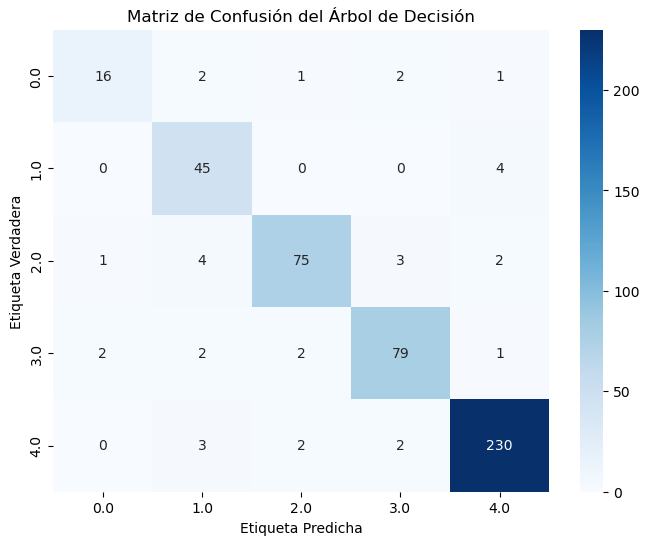

In [8]:
# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión del Árbol de Decisión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [9]:
# Imprimir el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_dt))

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78        22
         1.0       0.80      0.92      0.86        49
         2.0       0.94      0.88      0.91        85
         3.0       0.92      0.92      0.92        86
         4.0       0.97      0.97      0.97       237

    accuracy                           0.93       479
   macro avg       0.89      0.88      0.89       479
weighted avg       0.93      0.93      0.93       479



In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
# Crear el modelo 
decision_tree = DecisionTreeClassifier(random_state=42)

# Definir los hiperparámetros 
param_grid = {
    'criterion': ['gini', 'entropy'],               # Criterio de división (impureza de Gini o entropía)
    'max_depth': [None, 10, 20, 30, 40, 50],        # Profundidad máxima del árbol
    'min_samples_split': [2, 10, 20],               # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 5, 10],                 # Número mínimo de muestras en una hoja
    'max_features': [None, 'sqrt', 'log2'],         # Número máximo de características a considerar para encontrar la mejor división
}

# Configurar GridSearchCV para ajustar los hiperparámetros con validación cruzada
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [12]:
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=1)

In [13]:
# Utilizar el mejor modelo encontrado por GridSearchCV
best_tree = grid_search.best_estimator_

# Realizar predicciones con los datos de prueba
y_pred = best_tree.predict(X_test)

In [14]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

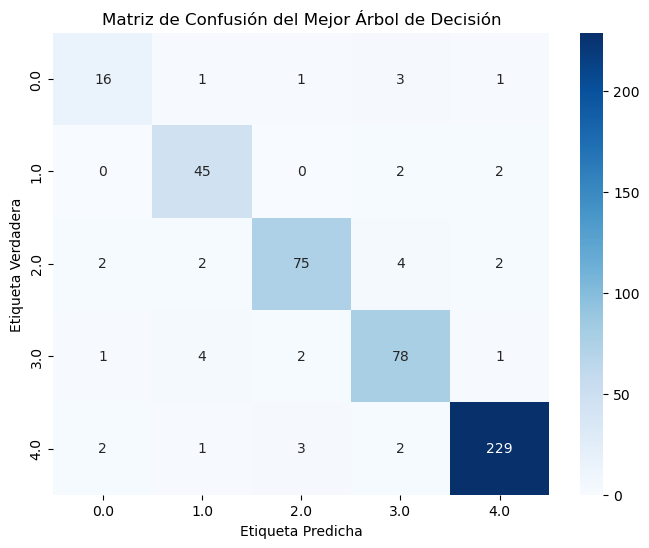

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión del Mejor Árbol de Decisión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74        22
         1.0       0.85      0.92      0.88        49
         2.0       0.93      0.88      0.90        85
         3.0       0.88      0.91      0.89        86
         4.0       0.97      0.97      0.97       237

    accuracy                           0.92       479
   macro avg       0.88      0.88      0.88       479
weighted avg       0.93      0.92      0.92       479

